In [58]:
from util import *

# Load Transcripts & Clean-up formats
# transcript_dir = "transcripts/Bali-(Aman).txt"
file_name = "Bali-(julian)"
transcript_dir = "transcripts/Bali-(julian).txt"
transcripts = load_transcript(transcript_dir)


In [1]:
# Now do the evaluation
from phi.assistant import Assistant
import json
from phi.llm.openai import OpenAIChat

# Initialize LLM Assistant: In this case, GPT-4
assistant = Assistant(
    llm=OpenAIChat(model="gpt-4-turbo-2024-04-09", max_tokens=1024, temperature=0.3), # 14s quality good
    tools = [],
    show_tool_calls=True,
    max_tokens=2048, 
    temperature=0.3)

In [63]:
# Product Knowledge Evaluator 
eval_message = get_eval_message(product_knowledge, transcripts, knowledge=product_info, with_info=True)
assistant.print_response(eval_message, markdown=True, stream=False)
unparsed_judgement = assistant.memory.chat_history[-1].content
judgements = direct_parse_judgement(unparsed_judgement, product_knowledge)
store_judgement(judgements, file_name)


Output()

╭──────────┬──────────────────────────────────────────────────────────────────────────────────────────────────────╮
│          │ Check the FWD insurance agent's performance in the following transcript, spot the errors and give    │
│          │ suggestions on how to improve the agent's performance. Here are some relevant product knowledge:     │
│          │                                                                                                      │
│          │ Refer to <productinformation> to check the conversation transcript against policy details.           │
│          │ <productinformation>                                                                                 │
│          │     Companies:                                                                                       │
│          │   FWD:                                                                                               │
│          │     Product Name: "Set for Life"                                                                     │
│          │     Product Type: "Limited Pay VUL"                                                                  │
│          │     Premium Payment Period: "5, 7, 10"                                                               │
│          │     Currency: "PHP"                                                                                  │
│          │     Minimum Premium: "5Pay - PHP 40k, 7Pay - PHP 24k, 10Pay - PHP 20k"                               │
│          │     Minimum SA: "500% of regular annual premium"                                                     │
│          │     SA Flexibility: "Yes, with SA Multiplier"                                                        │
│          │     Issue Age: "0 to 70 years old"                                                                   │
│          │     Insurance Coverage: "Up to age 100"                                                              │
│          │     Death Benefit: "Higher of (SA, AV)"                                                              │
│          │     Underwriting: "Full Underwriting"                                                                │
│          │     Mandatory Riders: "Accident, WP"                                                                 │
│          │     Optional Riders: "Term Rider, CI, HIB"                                                           │
│          │     Commission: "5 Pay - 30%/10%/5%, 7 Pay - 35%/10%/5%, 10 Pay - 40%/15%/5%/5%/5%"                  │
│          │     Premium Charge: "5Pay -70%/45%/0%, 7Pay - 75%/50%/10%/10%, 10Pay - 90%/60%/35%/0%"               │
│          │     Policy Fee: "n/a"                                                                                │
│          │     Premium Holiday Charge: "None"                                                                   │
│          │     Premium Extension Bonus: "n/a"                                                                   │
│          │     Surrender Charge: "None"                                                                         │
│          │                                                                                                      │
│          │   AXA Life:                                                                                          │
│          │     Product Name: "My Life Choice"                                                                   │
│          │     Product Type: "Limited Pay VUL"                                                                  │
│          │     Premium Payment Period: "7, 10"                                                                  │
│          │     Currency: "PHP and USD"                                                                          │
│          │     Minimum Premium: "7 pay - PHP 30k, 10 pay - PHP 20k"                                             │
│          │     Minimum SA: "7 pay - PHP 210k, 10 pay -

File not found. Creating a new file.


In [64]:
# relationship management evaluator
eval_message = get_eval_message(relationship_management, transcripts, with_info=False)
assistant.print_response(eval_message, markdown=True, stream=False)
unparsed_judgement = assistant.memory.chat_history[-1].content
judgements = direct_parse_judgement(unparsed_judgement, relationship_management)
store_judgement(judgements, file_name)

Output()

╭──────────┬──────────────────────────────────────────────────────────────────────────────────────────────────────╮
│          │ Check the FWD insurance agent's performance in the following transcript, spot the errors and give    │
│          │ suggestions on how to improve the agent's performance. Here are some of the potential issues that    │
│          │ you can check for                                                                                    │
│          │ [POTENTIAL ISSUE]                                                                                    │
│          │ - 2a: Did AGENT open the conversation with professional and friendly greeting?                       │
│          │ - 2b: Did AGENT initial small talk or show genuine interest in CUSTOMER to build rapport?            │
│          │ - 2c: Did AGENT ask questions to elicit sharing about CUSTOMER background?                           │
│          │ - 2d: Did AGENT ask questions to elicit sharing about CUSTOMER needs?                                │
│          │ - 2e: Did AGENT do active listening by asking follow-up question about CUSTOMER's background?        │
│          │ - 2f: Did AGENT do active listening by paraphrasing or summarizing what CUSTOMER shared?             │
│          │ - 2g: Did AGENT demonstrate personalization by referencing customer-specific information previously  │
│          │ shared?                                                                                              │
│          │ - 2h: Did AGENT mention that there will be future follow-up or check-in?                             │
│          │ - 2i: Did AGENT make explicit commitments to service quality and availability for future assistance? │
│          │ - 2j: Did AGENT give an example of how AGENT helped another customer solve a problem in the past?    │
│          │ - 2k: Did AGENT explain how CUSTOMER can get help when needed?                                       │
│          │ - 2l: Did AGENT actively ask for feedback?                                                           │
│          │ - 2m: Did AGENT respond constructively to feedback?                                                  │
│          │                                                                                                      │
│          │ [TRANSCRIPT]                                                                                         │
│          │ Customer: Hello there.                                                                               │
│          │ Agent: Hi there, Rico. How are you today?                                                            │
│          │ Customer: I'm doing pretty good, thanks for asking. What brings you to this side of town today,      │
│          │ Julian? Did you have other meetings around here or just ours?                                        │
│          │ Agent: No, I had a conference today, but more than happy to make the time to chat with you today.    │
│          │ Customer: That's great. I've heard some good things about FWD and your services, so can you tell me  │
│          │ more about insurance options that would be good for someone in my line of work? I mean, as a stunt   │
│          │ actor, I'm always pushing the limits, and I kinda want to make sure I'm covered properly.            │
│          │ Agent: I guess as a stunt actor, you could be exposing yourself to a lot of risk.                    │
│          │ Customer: Exactly, I need to make sure I'm considering all my options. What kind of accidental or    │
│          │ permanent disability benefits does the, definitely want to look into. I've heard that FWD offers a   │
│          │ variety of plans, including ones that might fit my high-risk job.                                    │
│          │ Customer: Could you explain a bit about what these plans specifically cover when it comes to on-set  │
│          │ accidents or injuries? How do they differ f

In [65]:
# sales skill evaluator
eval_message = get_eval_message(sale_skills, transcripts, with_info=False)
assistant.print_response(eval_message, markdown=True, stream=False)
unparsed_judgement = assistant.memory.chat_history[-1].content
judgements = direct_parse_judgement(unparsed_judgement, sale_skills)
store_judgement(judgements, file_name)

Output()

╭──────────┬──────────────────────────────────────────────────────────────────────────────────────────────────────╮
│          │ Check the FWD insurance agent's performance in the following transcript, spot the errors and give    │
│          │ suggestions on how to improve the agent's performance. Here are some of the potential issues that    │
│          │ you can check for                                                                                    │
│          │ [POTENTIAL ISSUE]                                                                                    │
│          │ - 3a: Did AGENT explain USP (Unique Selling Point) of policy compared to competitor?                 │
│          │ - 3b: Did AGENT link policy benefits with CUSTOMER's particular situation?                           │
│          │ - 3c: Did AGENT acknowledge all CUSTOMER objections and concerns with empathy?                       │
│          │ - 3d: Did AGENT propose a solution or alternative to all CUSTOMER objections and concerns?           │
│          │ - 3e: Did AGENT check CUSTOMER readiness to buy before the conversation ended?                       │
│          │ - 3f: Did AGENT summarize key benefits linked to client needs before the conversation ended?         │
│          │ - 3g: Did AGENT state the next steps after this conversation?                                        │
│          │ - 3h: Did AGENT ask questions to assess potential to up-sell or cross-sell?                          │
│          │                                                                                                      │
│          │ [TRANSCRIPT]                                                                                         │
│          │ Customer: Hello there.                                                                               │
│          │ Agent: Hi there, Rico. How are you today?                                                            │
│          │ Customer: I'm doing pretty good, thanks for asking. What brings you to this side of town today,      │
│          │ Julian? Did you have other meetings around here or just ours?                                        │
│          │ Agent: No, I had a conference today, but more than happy to make the time to chat with you today.    │
│          │ Customer: That's great. I've heard some good things about FWD and your services, so can you tell me  │
│          │ more about insurance options that would be good for someone in my line of work? I mean, as a stunt   │
│          │ actor, I'm always pushing the limits, and I kinda want to make sure I'm covered properly.            │
│          │ Agent: I guess as a stunt actor, you could be exposing yourself to a lot of risk.                    │
│          │ Customer: Exactly, I need to make sure I'm considering all my options. What kind of accidental or    │
│          │ permanent disability benefits does the, definitely want to look into. I've heard that FWD offers a   │
│          │ variety of plans, including ones that might fit my high-risk job.                                    │
│          │ Customer: Could you explain a bit about what these plans specifically cover when it comes to on-set  │
│          │ accidents or injuries? How do they differ from typical health insurance coverage?                    │
│          │ Agent: Yeah, sure, Rico. And apologies for cutting you off. You're probably interested in our        │
│          │ medical plans.                                                                                       │
│          │ Customer: Right, but I'm thinking more along the lines of accidental death or disability coverage.   │
│          │ Could you give me an overview of what the accidental death benefit would specifically include and if │
│          │ there are any conditions or exclusions I should be aware of?                                         │
│          │ Agent: Yes, importantly, it has to be an ac

In [67]:
# communication skill evaluator
eval_message = get_eval_message(communication_skills, transcripts, with_info=False)
assistant.print_response(eval_message, markdown=True, stream=False)
unparsed_judgement = assistant.memory.chat_history[-1].content
judgements = direct_parse_judgement(unparsed_judgement, communication_skills)
store_judgement(judgements, file_name)

Output()

╭──────────┬──────────────────────────────────────────────────────────────────────────────────────────────────────╮
│          │ Check the FWD insurance agent's performance in the following transcript, spot the errors and give    │
│          │ suggestions on how to improve the agent's performance. Here are some of the potential issues that    │
│          │ you can check for                                                                                    │
│          │ [POTENTIAL ISSUE]                                                                                    │
│          │ - 4a: Did AGENT use examples or analogies to explain complex insurance terms?                        │
│          │ - 4b: Did AGENT ask at least one question to check CUSTOMER's understanding?                         │
│          │ - 4c: Throughout the whole transcript, did AGENT keep explanation succinct without unnecessary       │
│          │ details?                                                                                             │
│          │ - 4d: Did AGENT emphasize key points without unnecessary repetition?                                 │
│          │ - 4e: Did AGENT summarize lengthy discussions?                                                       │
│          │ - 4f: Did AGENT adjust communication style and language use to CUSTOMER's style and language?        │
│          │ - 4g: Did AGENT quickly address all misunderstandings if any?                                        │
│          │ - 4h: Was AGENT sensitive to cultural norms?                                                         │
│          │ - 4i: Did AGENT use words like 'I See' or 'I Understand' to show active listening?                   │
│          │ - 4j: Did AGENT reflect or paraphrase CUSTOMER statements?                                           │
│          │                                                                                                      │
│          │ [TRANSCRIPT]                                                                                         │
│          │ Customer: Hello there.                                                                               │
│          │ Agent: Hi there, Rico. How are you today?                                                            │
│          │ Customer: I'm doing pretty good, thanks for asking. What brings you to this side of town today,      │
│          │ Julian? Did you have other meetings around here or just ours?                                        │
│          │ Agent: No, I had a conference today, but more than happy to make the time to chat with you today.    │
│          │ Customer: That's great. I've heard some good things about FWD and your services, so can you tell me  │
│          │ more about insurance options that would be good for someone in my line of work? I mean, as a stunt   │
│          │ actor, I'm always pushing the limits, and I kinda want to make sure I'm covered properly.            │
│          │ Agent: I guess as a stunt actor, you could be exposing yourself to a lot of risk.                    │
│          │ Customer: Exactly, I need to make sure I'm considering all my options. What kind of accidental or    │
│          │ permanent disability benefits does the, definitely want to look into. I've heard that FWD offers a   │
│          │ variety of plans, including ones that might fit my high-risk job.                                    │
│          │ Customer: Could you explain a bit about what these plans specifically cover when it comes to on-set  │
│          │ accidents or injuries? How do they differ from typical health insurance coverage?                    │
│          │ Agent: Yeah, sure, Rico. And apologies for cutting you off. You're probably interested in our        │
│          │ medical plans.                                                                                       │
│          │ Customer: Right, but I'm thinking more alon

In [68]:
# analytical skill evaluator
eval_message = get_eval_message(analytical_skills, transcripts, with_info=False)
assistant.print_response(eval_message, markdown=True, stream=False)
unparsed_judgement = assistant.memory.chat_history[-1].content
judgements = direct_parse_judgement(unparsed_judgement, analytical_skills)
store_judgement(judgements, file_name)

Output()

╭──────────┬──────────────────────────────────────────────────────────────────────────────────────────────────────╮
│          │ Check the FWD insurance agent's performance in the following transcript, spot the errors and give    │
│          │ suggestions on how to improve the agent's performance. Here are some of the potential issues that    │
│          │ you can check for                                                                                    │
│          │ [POTENTIAL ISSUE]                                                                                    │
│          │ - 5a: Did AGENT point out issues or gaps in CUSTOMER's current insurance coverage if CUSTOMER has    │
│          │ existing insurance coverage?                                                                         │
│          │ - 5b: Did AGENT ask questions to check CUSTOMER's understanding of insurance coverage?               │
│          │                                                                                                      │
│          │ [TRANSCRIPT]                                                                                         │
│          │ Customer: Hello there.                                                                               │
│          │ Agent: Hi there, Rico. How are you today?                                                            │
│          │ Customer: I'm doing pretty good, thanks for asking. What brings you to this side of town today,      │
│          │ Julian? Did you have other meetings around here or just ours?                                        │
│          │ Agent: No, I had a conference today, but more than happy to make the time to chat with you today.    │
│          │ Customer: That's great. I've heard some good things about FWD and your services, so can you tell me  │
│          │ more about insurance options that would be good for someone in my line of work? I mean, as a stunt   │
│          │ actor, I'm always pushing the limits, and I kinda want to make sure I'm covered properly.            │
│          │ Agent: I guess as a stunt actor, you could be exposing yourself to a lot of risk.                    │
│          │ Customer: Exactly, I need to make sure I'm considering all my options. What kind of accidental or    │
│          │ permanent disability benefits does the, definitely want to look into. I've heard that FWD offers a   │
│          │ variety of plans, including ones that might fit my high-risk job.                                    │
│          │ Customer: Could you explain a bit about what these plans specifically cover when it comes to on-set  │
│          │ accidents or injuries? How do they differ from typical health insurance coverage?                    │
│          │ Agent: Yeah, sure, Rico. And apologies for cutting you off. You're probably interested in our        │
│          │ medical plans.                                                                                       │
│          │ Customer: Right, but I'm thinking more along the lines of accidental death or disability coverage.   │
│          │ Could you give me an overview of what the accidental death benefit would specifically include and if │
│          │ there are any conditions or exclusions I should be aware of?                                         │
│          │ Agent: Yes, importantly, it has to be an accident and I think you need to recognize it in your line  │
│          │ of work. It's actually not likely to be an accident.                                                 │
│          │ Customer: I see, but I suppose it's better to be safe than sorry. Are there any specific limitations │
│          │ or exceptions in the accidental coverage that I should particularly look out for in our field? Like, │
│          │ does it cover all types of injuries, or are there certain scenarios where it might not apply?        │
│          │ Agent: Videos if you're, for example, outsi

In [71]:
def generate_report(assistant, file_name):

    # Get Scores for Each Attribute & Ensemble the Scores
    attribute_scores = get_attribute_scores(file_name)
    ensemble_score = process_ensemble_score(attribute_scores)

    # Convert the json file into a string, and ask LLM to compress the evaluation result into a proper report 
    file_path = f"transcripts/feedback/{file_name}.json"
    # Load the JSON data from the file
    with open(file_path, 'r') as file:
        data = json.load(file)


    # Prepare Evaluation String
    eval_str = ""
    for p in data:
        info, attribute = map_id_to_info(p["error_id"])
        p_str = f"""\n-- {attribute}: {info}\n[Assessment] {p['assessment']} \n {p['reason']} \n {p['extract']} \n {p['improvement']}"""
        eval_str += p_str
    eval_str = eval_str.strip()
    print(eval_str)

    # Prepare Score String
    scores_str = ""
    for k, v in ensemble_score.items():
        attribute = map_id_to_attribute(str(k))
        score = int(v * 100)
        s_str = f"\nOn {attribute}, the agent has a score of {score}/100."
        scores_str += s_str
    scores_str = scores_str.strip()

    feedback_message = FEEDBACK_REPORT_TEMPLATE.format(eval_str=eval_str, scores_str=scores_str)
    assistant.print_response(feedback_message, markdown=True, stream=False)
    report = assistant.memory.chat_history[-1].content
    file_path = f"transcripts/feedback/{file_name}_feedback_report.txt"
    with open(file_path, "w") as file:
        file.write(report)
    return report

In [72]:
from util import *

# Get Scores for Each Attribute & Ensemble the Scores
# attribute_scores = get_attribute_scores(file_name)
# ensemble_score = process_ensemble_score(attribute_scores)
# Report Generation Bit
report = generate_report(assistant, file_name)


Output()

-- Product and Industry Knowledge: Did_AGENT use any wrong insurance terms (reverse)
[Assessment] True 
 REASON: The agent did not use any incorrect insurance terms. 
 EXTRACT: "Right, but I'm thinking more along the lines of accidental death or disability coverage." 
 IMPROVEMENT: N/A
-- Product and Industry Knowledge: Did_AGENT_explain_the_value_of_insurance_in_mitigating_risk
[Assessment] False 
 REASON: The agent did not explicitly explain how insurance mitigates risks, especially relevant to the customer's high-risk job. 
 EXTRACT: "I guess as a stunt actor, you could be exposing yourself to a lot of risk." 
 IMPROVEMENT: "Insurance, especially with accidental death and disability coverage, acts as a safety net that financially protects you and your family in case of unforeseen incidents during your stunts, effectively reducing the financial risk associated with your profession."
-- Product and Industry Knowledge: Did AGENT explain coverage of the policy?
[Assessment] False 
 REAS

╭──────────┬──────────────────────────────────────────────────────────────────────────────────────────────────────╮
│          │ Based on the detailed evaluation results and scores for each attribute of the FWD insurance sales    │
│          │ agent's performance, please provide an evaluation and feedback report. The report should detail the  │
│          │ performance in each category, the percentage score, and suggestions for improvement.                 │
│          │                                                                                                      │
│          │ [DETAILED EVALUATION]                                                                                │
│          │ -- Product and Industry Knowledge: Did_AGENT use any wrong insurance terms (reverse)                 │
│          │ [Assessment] True                                                                                    │
│          │  REASON: The agent did not use any incorrect insurance terms.                                        │
│          │  EXTRACT: "Right, but I'm thinking more along the lines of accidental death or disability coverage." │
│          │  IMPROVEMENT: N/A                                                                                    │
│          │ -- Product and Industry Knowledge: Did_AGENT_explain_the_value_of_insurance_in_mitigating_risk       │
│          │ [Assessment] False                                                                                   │
│          │  REASON: The agent did not explicitly explain how insurance mitigates risks, especially relevant to  │
│          │ the customer's high-risk job.                                                                        │
│          │  EXTRACT: "I guess as a stunt actor, you could be exposing yourself to a lot of risk."               │
│          │  IMPROVEMENT: "Insurance, especially with accidental death and disability coverage, acts as a safety │
│          │ net that financially protects you and your family in case of unforeseen incidents during your        │
│          │ stunts, effectively reducing the financial risk associated with your profession."                    │
│          │ -- Product and Industry Knowledge: Did AGENT explain coverage of the policy?                         │
│          │ [Assessment] False                                                                                   │
│          │  REASON: The agent provided minimal and vague details about the coverage specifics.                  │
│          │  EXTRACT: "Yes, importantly, it has to be an accident and I think you need to recognize it in your   │
│          │ line of work."                                                                                       │
│          │  IMPROVEMENT: "Our accidental death and disability coverage includes financial compensation for      │
│          │ accidents resulting in death or severe disability. It's specifically designed to cover incidents     │
│          │ that could occur during stunts, ensuring you're protected in your line of work."                     │
│          │ -- Product and Industry Knowledge: Did AGENT explain features of the policy?                         │
│          │ [Assessment] False                                                                                   │
│          │  REASON: The agent's explanations of policy features were unclear and incomplete.                    │
│          │  EXTRACT: "For sprains and mild injuries, you can receive General practitioner treatment and that's  │
│          │ unlimited."                                                                                          │
│          │  IMPROVEMENT: "Our policy features include unlimited general practitioner treatments for minor       │
│          │ injuries like sprains. For more severe cases requiring hospitalization, there's a deductible of 1000 │
│          │ Hong Kong Dollars, ensuring you're covered 

In [7]:
from util import *
# StarChart Generation

# file_name = "Bali-(julian)"
file_name = "Bali-(Aman)"
attribute_scores = get_attribute_scores(file_name)
ensemble_score = process_ensemble_score(attribute_scores)

In [5]:
attribute_scores

{'1': [1, 0, 0, 0, 1, 0, 0, 0],
 '2': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 '3': [0, 1, 0, 1, 0, 0, 0, 0],
 '4': [0, 0, 1, 1, 0, 1, 0, 1, 1, 0],
 '5': [0, 0]}

In [8]:
# attribute_scores
average_scores = {attribute: sum(scores) / len(scores) * 100 for attribute, scores in attribute_scores.items()}
average_scores


{'1': 25.0, '2': 33.33333333333333, '3': 25.0, '4': 50.0, '5': 0.0}

/Users/fangyuanyu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


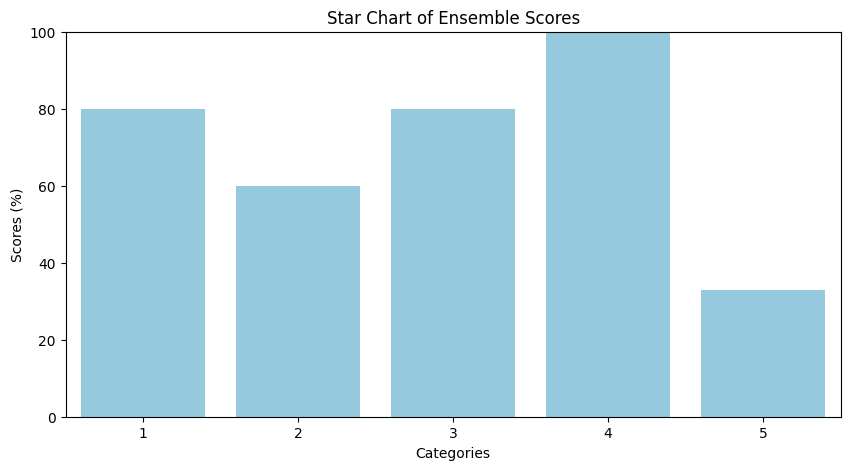

In [7]:
from util import *
# StarChart Generation

file_name = "Bali-(julian)"
# file_name = "Bali-(Aman)"
attribute_scores = get_attribute_scores(file_name)
ensemble_score = process_ensemble_score(attribute_scores)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'ensemble_score' is a dictionary with keys as categories and values as scores
categories = list(ensemble_score.keys())
scores = [score * 100 for score in ensemble_score.values()]  # Convert proportion scores to percentages

plt.figure(figsize=(10, 5))
sns.barplot(x=categories, y=scores, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Scores (%)')
plt.title('Star Chart of Ensemble Scores')
plt.ylim(0, 100)  # Limit y-axis to 100 for percentage representation
plt.show()

In [8]:
ensemble_score

{'1': 0.8, '2': 0.6, '3': 0.8, '4': 1, '5': 0.33}

In [10]:

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Read dataset from csv and perform preprocessing
data = pd.read_csv('data.csv')

# Remove goalkeepers data for performing fair comparison
goalkeeper_index = data[data['Position'] == 'GK'].index
data.drop(goalkeeper_index, inplace=True)

# Define columns required for visualization
plt_vars = ['SprintSpeed', 'Agility', 'Stamina', 'Aggression', 'Positioning', 'Vision']
data = data[plt_vars + ['Name', 'Overall', 'Potential']]

# Plot unfilled scatter plot
fig1 = px.line_polar(data, r=data.loc[1, plt_vars].values, theta=plt_vars, line_close=True,
                     title=f'{data.loc[1, "Name"]} \n Overall: {data.loc[1, "Overall"]} \n Potential: {data.loc[1, "Potential"]}',
                     width=500)
fig1.show()

# Plot filled star plot for the first player
fig2 = go.Figure(data=go.Scatterpolar(
    r=data.loc[0, plt_vars].values,
    theta=plt_vars,
    fill='toself',
    name=f'{data.loc[0, "Name"]} (Overall: {data.loc[0, "Overall"]} \n Potential: {data.loc[0, "Potential"]})'
))
fig2.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
        ),
    ),
    template='plotly_dark',
    showlegend=True,
)
fig2.show()

# Plot star plot for comparison between two players
fig3 = go.Figure()
fig3.add_trace(go.Scatterpolar(
    r=data.loc[1, plt_vars].values,
    theta=plt_vars,
    fill='toself',
    name=data.loc[1, 'Name']
))
fig3.add_trace(go.Scatterpolar(
    r=data.loc[0, plt_vars].values,
    theta=plt_vars,
    fill='toself',
    name=data.loc[0, 'Name']
))
fig3.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True
        )),
    template='plotly_dark',
    showlegend=True
)
fig3.show()


FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'